# Series of experiments performed with ibab implementation of wavenet

## Input data

Import and plot input data

In [3]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import librosa, librosa.display
import IPython.display as ipd
import numpy as np
import scipy as sc

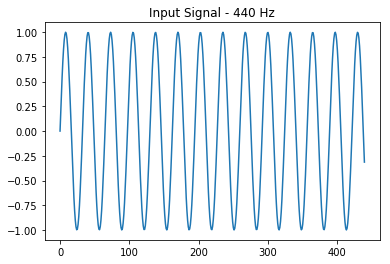

In [169]:
signal = wavfile.read('corpus/oneSin/sinus16000.wav')
signal = signal[1]
plt.figure(1)
plt.title('Input Signal - 440 Hz')
reduced = signal[:440]
plt.plot(reduced)
plt.show()

In this first  experiment we used the recommendations from the paper. That means 5 stacked layers with 10 dilation layers per stack. That give a receptive field of **5116**.

`receptive_field = (filter_width - 1) * sum(dilations) + 1`
 
 where 
 
 `filter_width = 2`
 
 `dilations = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512,
	           1, 2, 4, 8, 16, 32, 64, 128, 256, 512,
               1, 2, 4, 8, 16, 32, 64, 128, 256, 512,
               1, 2, 4, 8, 16, 32, 64, 128, 256, 512,
               1, 2, 4, 8, 16, 32, 64, 128, 256, 512]`
               
100 epoch were used.

## Reducing wavenet

First experiments consisted of sinusoidal signal input with sample rate 16000 Hz and frequency 440 Hz. Some of the parameters have been modified in order to reduce the complexity and the computational cost of the network.

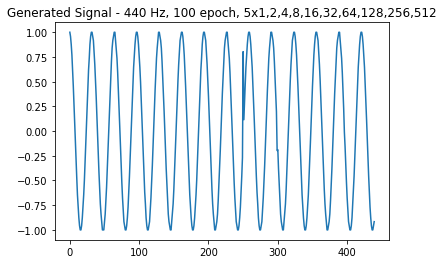

In [170]:
signal = wavfile.read('generatedSignals/longSin.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, 100 epoch, 5x1,2,4,8,16,32,64,128,256,512')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

Reducing the quantization give the following results:

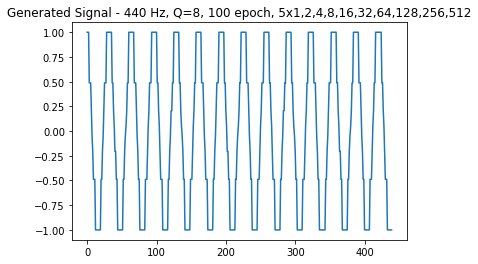

In [171]:
signal = wavfile.read('generatedSignals/quantization8.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, Q=8, 100 epoch, 5x1,2,4,8,16,32,64,128,256,512')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

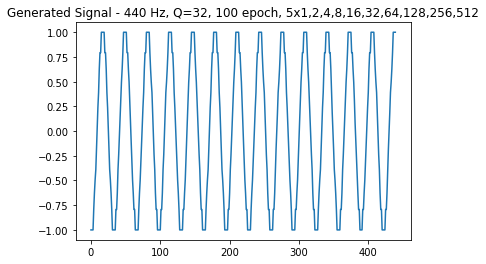

In [172]:
signal = wavfile.read('generatedSignals/quantization32.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, Q=32, 100 epoch, 5x1,2,4,8,16,32,64,128,256,512')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

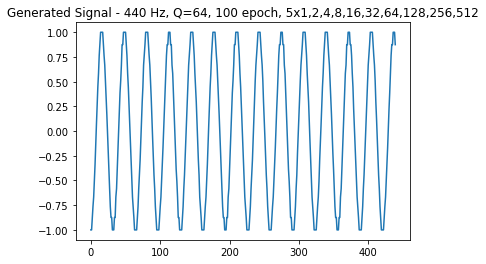

In [173]:
signal = wavfile.read('generatedSignals/quantization64.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, Q=64, 100 epoch, 5x1,2,4,8,16,32,64,128,256,512')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

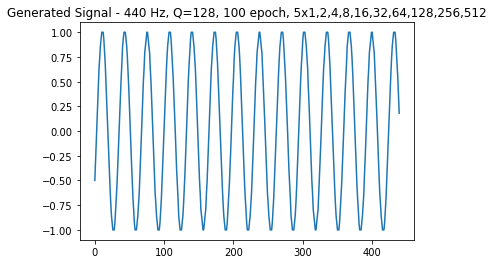

In [174]:
signal = wavfile.read('generatedSignals/quantization128.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, Q=128, 100 epoch, 5x1,2,4,8,16,32,64,128,256,512')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

Changing the quantization to **128** good results are achieved. Now, the number of layers will be decreased.

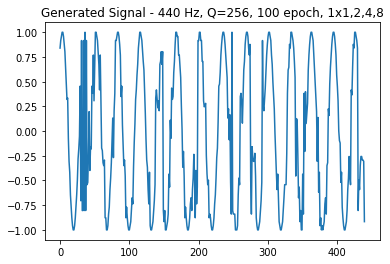

In [175]:
signal = wavfile.read('generatedSignals/dilations1x1248.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, Q=256, 100 epoch, 1x1,2,4,8')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

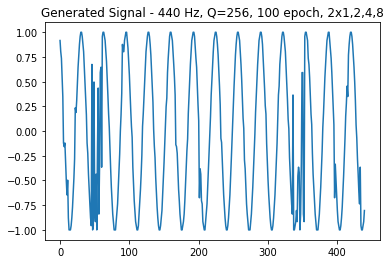

In [176]:
signal = wavfile.read('generatedSignals/dilations2x1248.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, Q=256, 100 epoch, 2x1,2,4,8')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

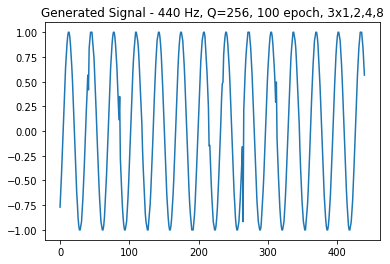

In [177]:
signal = wavfile.read('generatedSignals/dilations3x1248.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, Q=256, 100 epoch, 3x1,2,4,8')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

Finally a combination of the best results obtained with reducing the number stacked layers and the quantization steps is presented. Q = 128 and dilations = 3x[1,2,4,8]. The receptive field is equal to 47. This configuration will be used during the following experiments.

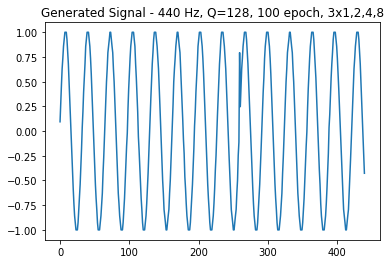

In [178]:
signal = wavfile.read('generatedSignals/dilations3x1248q128.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, Q=128, 100 epoch, 3x1,2,4,8')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

## Global Conditionality

In the original paper conditionality is used to control the speaker or the speech. Let's see how it behaves with different sinusoidal signals.

### Two frequencies

First we'll use two signals named sinus1.wav and sinus2.wav with frequencies 440Hz and 493.88

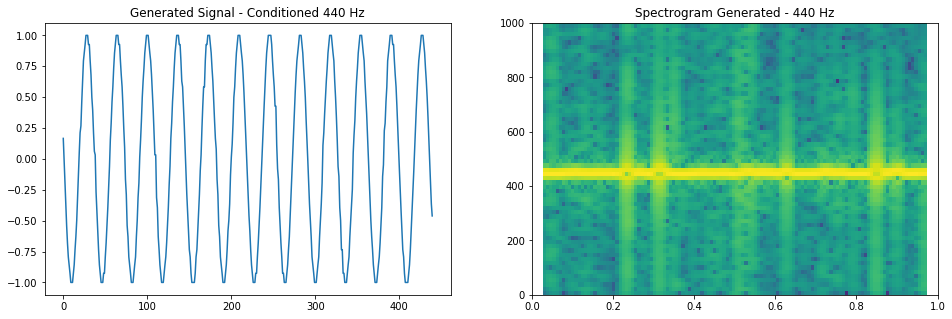

In [179]:
signal = wavfile.read('generatedSignals/consin1.wav')
signal = signal[1]
reduced = signal[-440:]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.plot(reduced); ax1.set_title('Generated Signal - Conditioned 440 Hz')
NFFT = 1024; Fs = 16000;
ax2.specgram(signal, NFFT=NFFT, Fs=Fs, noverlap=900);
ax2.set_title('Spectrogram Generated - 440 Hz')
plt.axis([0,1,0,1000]);

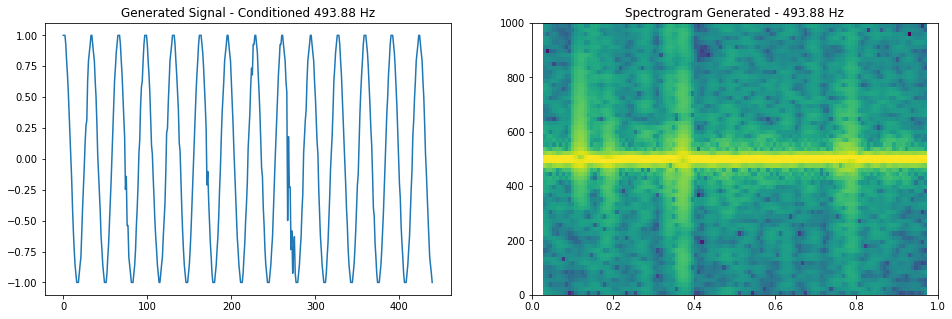

In [180]:
signal = wavfile.read('generatedSignals/consin2.wav')
signal = signal[1]
reduced = signal[-440:]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.plot(reduced); ax1.set_title('Generated Signal - Conditioned 493.88 Hz')
NFFT = 1024; Fs = 16000;
ax2.specgram(signal, NFFT=NFFT, Fs=Fs, noverlap=900);
ax2.set_title('Spectrogram Generated - 493.88 Hz')
plt.axis([0,1,0,1000]);

### One Scale

Now, the system was conditioned to learn one scale. That means that we conditioned that with 7 categories.
The frequencies used were:

`f = [440, 493.88, 523.25, 587.33, 659.25, 698.46, 783.99] #array of frequencies`

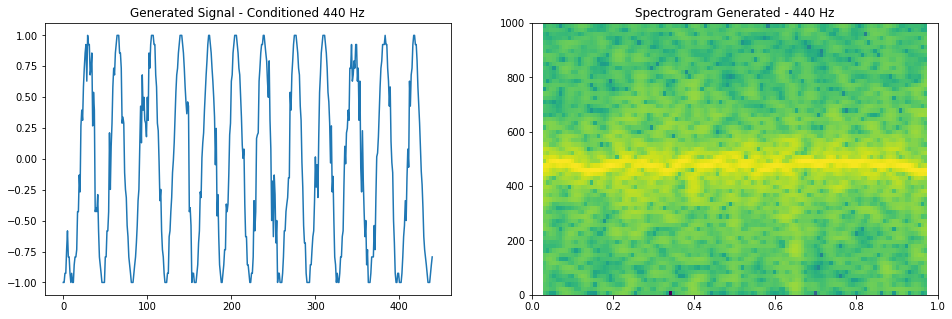

In [181]:
signal = wavfile.read('generatedSignals/scaleSin0.wav')
signal = signal[1]
reduced = signal[-440:]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.plot(reduced); ax1.set_title('Generated Signal - Conditioned 440 Hz')
NFFT = 1024; Fs = 16000;
ax2.specgram(signal, NFFT=NFFT, Fs=Fs, noverlap=900);
ax2.set_title('Spectrogram Generated - 440 Hz')
plt.axis([0,1,0,1000]);

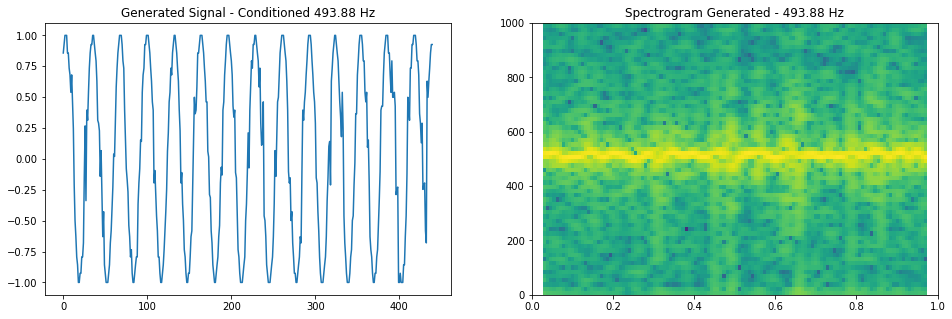

In [182]:
signal = wavfile.read('generatedSignals/scaleSin1.wav')
signal = signal[1]
reduced = signal[-440:]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.plot(reduced); ax1.set_title('Generated Signal - Conditioned 493.88 Hz')
NFFT = 1024; Fs = 16000;
ax2.specgram(signal, NFFT=NFFT, Fs=Fs, noverlap=900);
ax2.set_title('Spectrogram Generated - 493.88 Hz')
plt.axis([0,1,0,1000]);

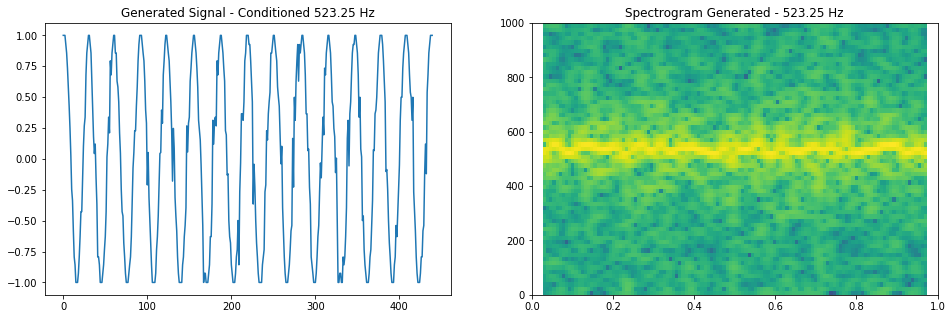

In [183]:
signal = wavfile.read('generatedSignals/scaleSin2.wav')
signal = signal[1]
reduced = signal[-440:]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.plot(reduced); ax1.set_title('Generated Signal - Conditioned 523.25 Hz')
NFFT = 1024; Fs = 16000;
ax2.specgram(signal, NFFT=NFFT, Fs=Fs, noverlap=900);
ax2.set_title('Spectrogram Generated - 523.25 Hz')
plt.axis([0,1,0,1000]);

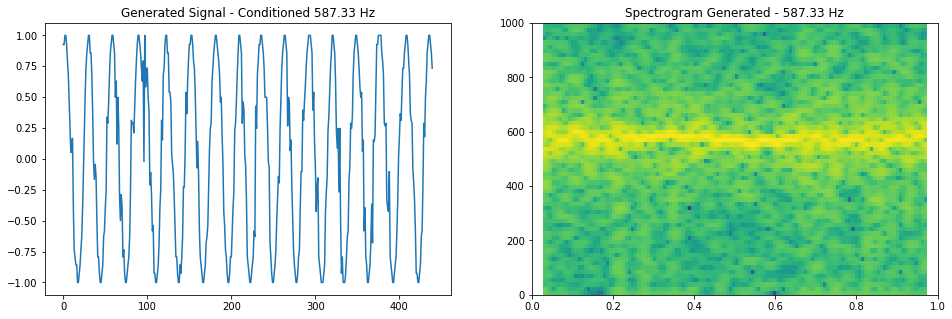

In [184]:
signal = wavfile.read('generatedSignals/scaleSin3.wav')
signal = signal[1]
reduced = signal[-440:]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.plot(reduced); ax1.set_title('Generated Signal - Conditioned 587.33 Hz')
NFFT = 1024; Fs = 16000;
ax2.specgram(signal, NFFT=NFFT, Fs=Fs, noverlap=900);
ax2.set_title('Spectrogram Generated - 587.33 Hz')
plt.axis([0,1,0,1000]);

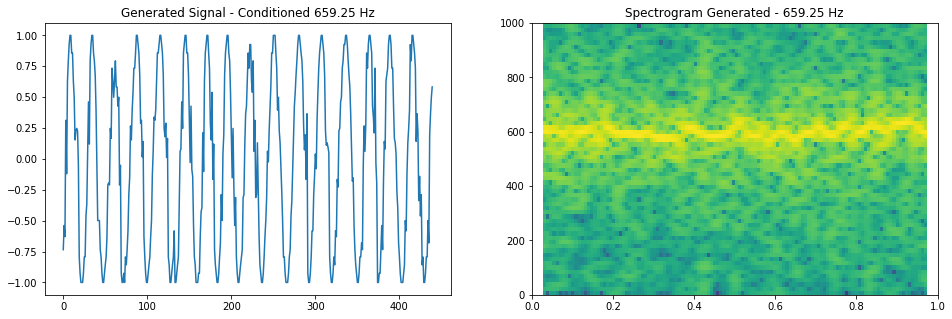

In [185]:
signal = wavfile.read('generatedSignals/scaleSin4.wav')
signal = signal[1]
reduced = signal[-440:]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.plot(reduced); ax1.set_title('Generated Signal - Conditioned 659.25 Hz')
NFFT = 1024; Fs = 16000;
ax2.specgram(signal, NFFT=NFFT, Fs=Fs, noverlap=900);
ax2.set_title('Spectrogram Generated - 659.25 Hz')
plt.axis([0,1,0,1000]);

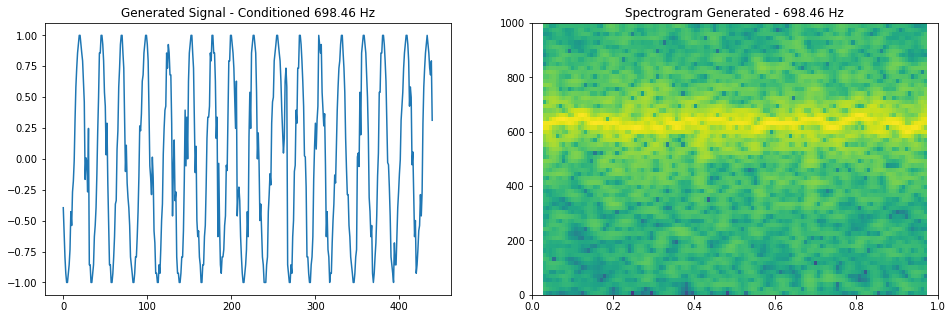

In [186]:
signal = wavfile.read('generatedSignals/scaleSin5.wav')
signal = signal[1]
reduced = signal[-440:]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.plot(reduced); ax1.set_title('Generated Signal - Conditioned 698.46 Hz')
NFFT = 1024; Fs = 16000;
ax2.specgram(signal, NFFT=NFFT, Fs=Fs, noverlap=900);
ax2.set_title('Spectrogram Generated - 698.46 Hz')
plt.axis([0,1,0,1000]);

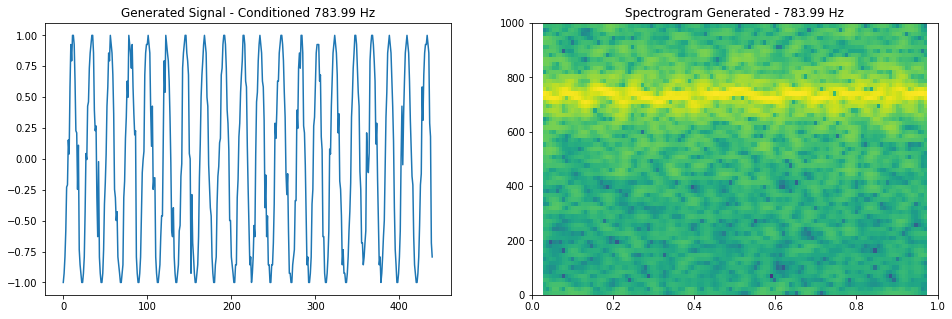

In [187]:
signal = wavfile.read('generatedSignals/scaleSin6.wav')
signal = signal[1]
reduced = signal[-440:]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.plot(reduced); ax1.set_title('Generated Signal - Conditioned 783.99 Hz')
NFFT = 1024; Fs = 16000;
ax2.specgram(signal, NFFT=NFFT, Fs=Fs, noverlap=900);
ax2.set_title('Spectrogram Generated - 783.99 Hz')
plt.axis([0,1,0,1000]);

As we can see the system is able to learn all the frequencies. However, more noise is added than before. This could be solved increasing the number of epochs, or increasing the complexity of the network.

### Changing shape, frequency and amplitude

Following experiments analyze the behaviour of the network with a training dataset consisted in different shapes, frequencies and amplitudes.

#### Different Amplitudes

Here we conditioned wavenet with four different amplitudes (0.25, 0.5, 0.75,1). Each amplitude is a category. 100 epoch was not enough, but increasing the number of epoch clearly increases the generated file. I used 250 epoch. From here we can see that wavenet is able to learn the amplitudes.

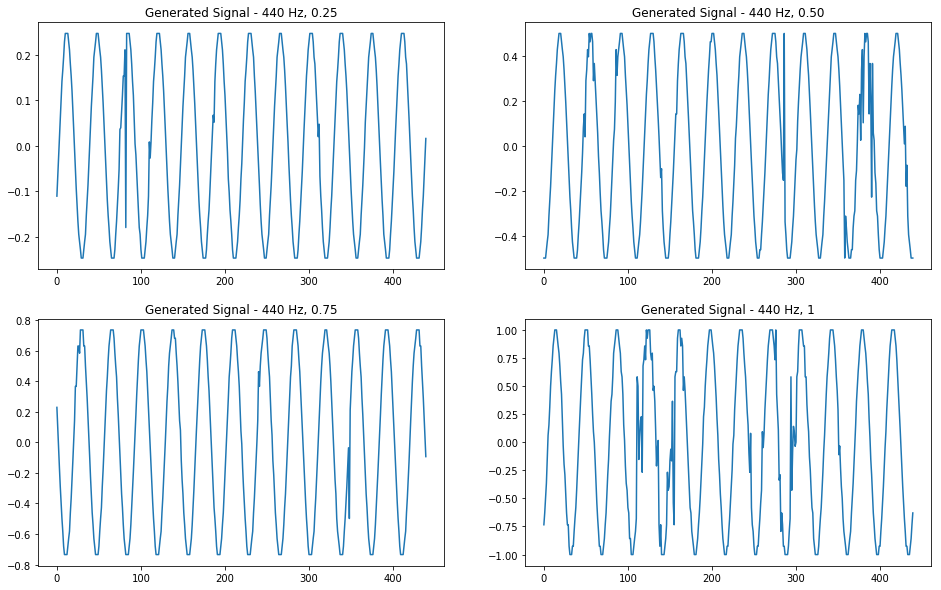

In [188]:
signal0 = wavfile.read('generatedSignals/amp0.wav')
signal0 = signal0[1]
reduced0 = signal0[-440:]
signal1 = wavfile.read('generatedSignals/amp1.wav')
signal1 = signal1[1]
reduced1 = signal1[-440:]
signal2 = wavfile.read('generatedSignals/amp2.wav')
signal2 = signal2[1]
reduced2 = signal2[-440:]
signal3 = wavfile.read('generatedSignals/amp3.wav')
signal3 = signal3[1]
reduced3 = signal3[-440:]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(16,10) )
ax1.plot(reduced0); ax1.set_title('Generated Signal - 440 Hz, 0.25')
ax2.plot(reduced1); ax2.set_title('Generated Signal - 440 Hz, 0.50')
ax3.plot(reduced2); ax3.set_title('Generated Signal - 440 Hz, 0.75')
ax4.plot(reduced3); ax4.set_title('Generated Signal - 440 Hz, 1');

#### Different Shapes

Here we trained wavenet with 2 different frequencies 440Hz and 880 Hz. With three different shapes of waveforms (sinusoidal, square, and sawtooth). The hypothesis is that wavenet will learn f0. 1000 epoch have been used as 100 and 250 gives poor results.

In [189]:
x, sr = librosa.load('generatedSignals/shape440_1000.wav')
ipd.Audio(x, rate=sr)

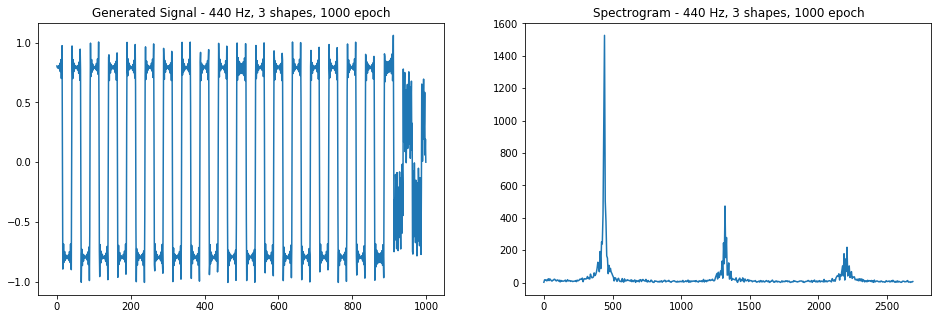

In [190]:
X = sc.fft(x[:4096])
X_mag = np.absolute(X)        # spectral magnitude
f = np.linspace(0, sr, 4096)  # frequency variable
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16,5) )
ax1.plot(x[-1000:]); ax1.set_title('Generated Signal - 440 Hz, 3 shapes, 1000 epoch')
ax2.plot(f[:500],X_mag[:500]); ax2.set_title('Spectrogram - 440 Hz, 3 shapes, 1000 epoch');

In [191]:
x, sr = librosa.load('generatedSignals/shape880_1000.wav')
ipd.Audio(x, rate=sr)

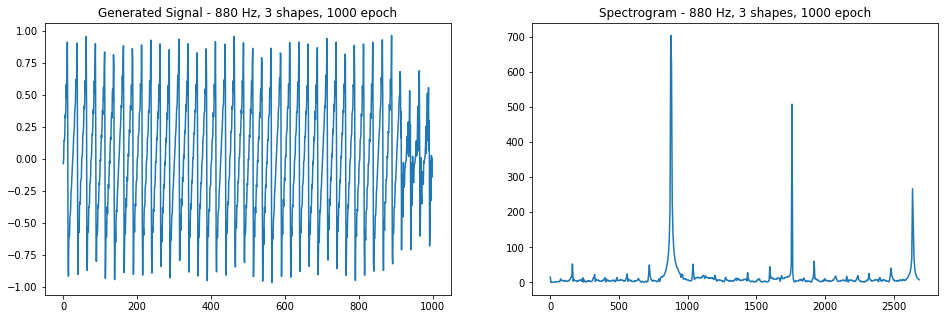

In [192]:
X = sc.fft(x[:4096])
X_mag = np.absolute(X)        # spectral magnitude
f = np.linspace(0, sr, 4096)  # frequency variable
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16,5) )
ax1.plot(x[-1000:]); ax1.set_title('Generated Signal - 880 Hz, 3 shapes, 1000 epoch')
ax2.plot(f[:500],X_mag[:500]); ax2.set_title('Spectrogram - 880 Hz, 3 shapes, 1000 epoch');

#### Different shapes and Amplitudes (Big Dataset)

From previous experiments we have seen that using global conditionality on wavenet makes it possible to learn different frequencies, different shapes, and different amplitudes. Moreover, when wavenet is trained with different waveforms with the same frequency (f0) it is able to learn this frequency. In this experiment wavenet is trained with a dataset of 900 signals, containing 100 different frequencies with different amplitudes and shapes. Each frequency will be a category for the global conditionality. The hypothesis is that wavenet will learn the f0.

This first example is generated with 1000 epoch, and a frequency of 1351 Hz.

In [193]:
x, sr = librosa.load('generatedSignals/random0.wav')
ipd.Audio(x, rate=sr)

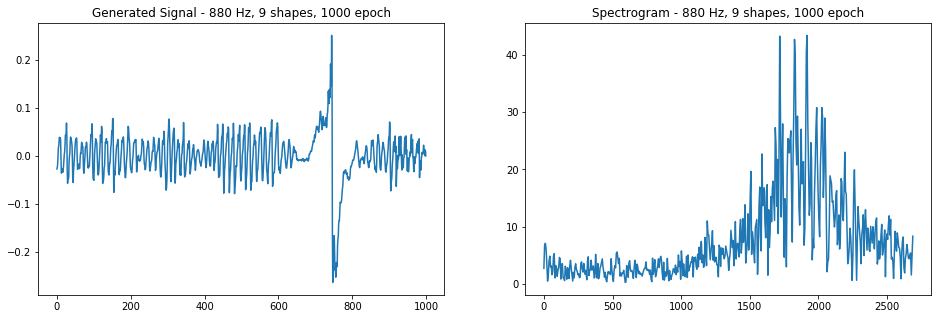

In [194]:
X = sc.fft(x[:4096])
X_mag = np.absolute(X)        # spectral magnitude
f = np.linspace(0, sr, 4096)  # frequency variable
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16,5) )
ax1.plot(x[-1000:]); ax1.set_title('Generated Signal - 880 Hz, 9 shapes, 1000 epoch')
ax2.plot(f[:500],X_mag[:500]); ax2.set_title('Spectrogram - 880 Hz, 9 shapes, 1000 epoch');

Poor results are achieved. The loss value was 1.4533637 for the last iteration. However that value, could be improved increasing the number of iterations. If that is not possible, then the network should be increased.

Increasing the number of epoch to 10000 the results achieved are much better. In this example the f0 was 3928 Hz, and in the same category there were 6 different files with the same f0 and different shapes and amplitudes.

In [195]:
x, sr = librosa.load('generatedSignals/random9999_6.wav')
ipd.Audio(x, rate=sr)

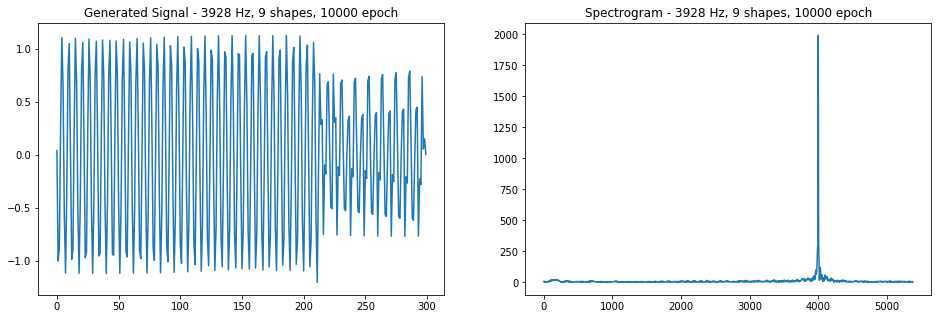

In [196]:
X = sc.fft(x[:4096])
X_mag = np.absolute(X)        # spectral magnitude
f = np.linspace(0, sr, 4096)  # frequency variable
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16,5) )
ax1.plot(x[-300:]); ax1.set_title('Generated Signal - 3928 Hz, 9 shapes, 10000 epoch')
ax2.plot(f[:1000],X_mag[:1000]); ax2.set_title('Spectrogram - 3928 Hz, 9 shapes, 10000 epoch');

F0 = 2659, 9 different shapes, 10000 epoch

In [197]:
x, sr = librosa.load('generatedSignals/random9999_54.wav')
ipd.Audio(x, rate=sr)

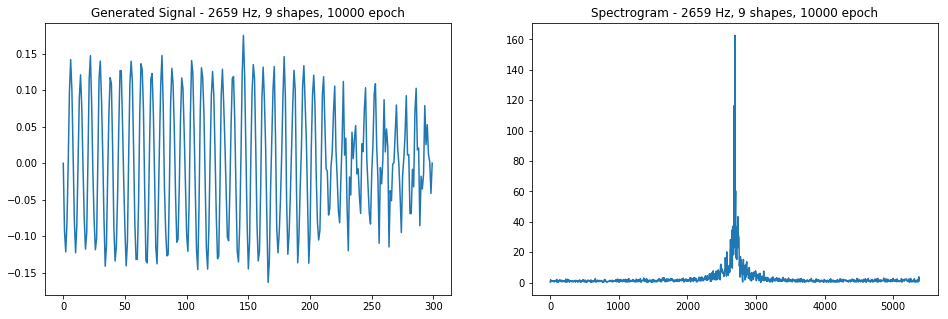

In [198]:
X = sc.fft(x[:4096])
X_mag = np.absolute(X)        # spectral magnitude
f = np.linspace(0, sr, 4096)  # frequency variable
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16,5) )
ax1.plot(x[-300:]); ax1.set_title('Generated Signal - 2659 Hz, 9 shapes, 10000 epoch')
ax2.plot(f[:1000],X_mag[:1000]); ax2.set_title('Spectrogram - 2659 Hz, 9 shapes, 10000 epoch');

F0 = 4136, 9 different shapes, 10000 epoch

In [199]:
x, sr = librosa.load('generatedSignals/random9999_75.wav')
ipd.Audio(x, rate=sr)

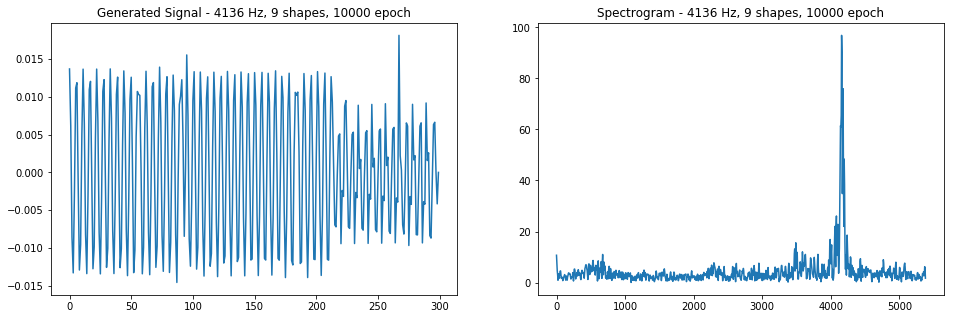

In [200]:
X = sc.fft(x[:4096])
X_mag = np.absolute(X)        # spectral magnitude
f = np.linspace(0, sr, 4096)  # frequency variable
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16,5) )
ax1.plot(x[-300:]); ax1.set_title('Generated Signal - 4136 Hz, 9 shapes, 10000 epoch')
ax2.plot(f[:1000],X_mag[:1000]); ax2.set_title('Spectrogram - 4136 Hz, 9 shapes, 10000 epoch');

F0 = 2413, 9 different shapes, 10000 epoch

In [201]:
x, sr = librosa.load('generatedSignals/random9999_99.wav')
ipd.Audio(x, rate=sr)

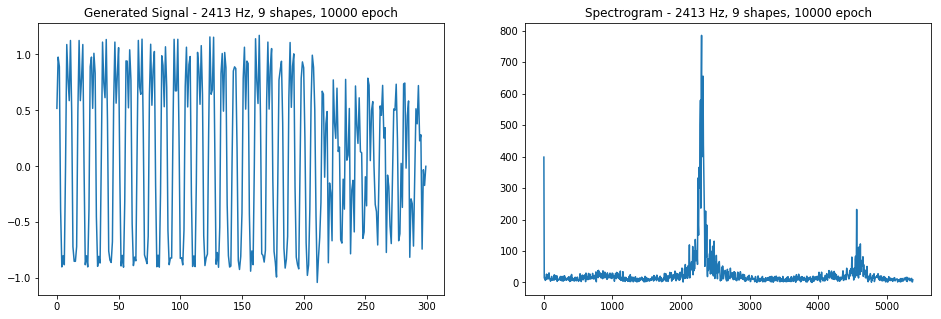

In [202]:
X = sc.fft(x[:4096])
X_mag = np.absolute(X)        # spectral magnitude
f = np.linspace(0, sr, 4096)  # frequency variable
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16,5) )
ax1.plot(x[-300:]); ax1.set_title('Generated Signal - 2413 Hz, 9 shapes, 10000 epoch')
ax2.plot(f[:1000],X_mag[:1000]); ax2.set_title('Spectrogram - 2413 Hz, 9 shapes, 10000 epoch');

#### Conclusions

* Wavenet is able to learn the shape of the signal.
* Wavenet is able to learn the amplitude of the signal.
* When globally conditioned wavenet could learn different frequencies.
* When globally conditioned with different waveforms having the same frequency, wavenet is able to learn that frequency.

## Local Conditioning

Local conditioning was used in the original paper to generate the specific words that wavenet had to reproduce. That was done adding a second time series vector or each sample. In the speech case, that vector contained linguistic features information in a TTS model.

In ibab's implementation, local conditioning is still not implemented. The main difficulty is that the network is training the model file by file instead of sample by sample. However, similar results could be achieved training the network with Global Condition and generating with Local Condition.

For this experiment, local conditioning in the generation part has been implemented. In the following example, wavenet has been trained with three different sinusoids corresponding to the a minor chord. Each sinusoid correspond to one category. Then, in the generation part, a .txt file containing the information for each sample is passed to the system. That allows us to create different sequences.

Three results are presented below.

The code is available on the github repository under the branch **localCondition_noGlobal.** 

`--samples 24000  --wav_out_path=generatedSignals/aminor3.wav --gc_channels=32 --gc_cardinality=3 `
`--labels=corpus/Aminor/aminor3.txt logdir/train/2018-04-13T17-51-32/model.ckpt-99`

In [33]:
x, sr = librosa.load('generatedSignals/aminor.wav')
ipd.Audio(x, rate=sr)

In [34]:
x, sr = librosa.load('generatedSignals/aminor2.wav')
ipd.Audio(x, rate=sr)

In [35]:
x, sr = librosa.load('generatedSignals/aminor3.wav')
ipd.Audio(x, rate=sr)

## Pitch Transformation

I wanted to see if modifying the target in the training wavenet was able to learn a transformation. For example feeding the network with a 440 Hz signal and a target consisting of a 880 Hz, I wanted to see if wavenet could learn the transformations. Although the loss function goes below 0.02 with 100 epoch, looks like in wavenet the input have to match the output. More information about this [here](https://github.com/ibab/tensorflow-wavenet/issues/272)

This implementation could be seen below the branch pitchTransformation [link](https://github.com/aleixcm/tensorflow-wavenet/tree/pitchTransformation)

## Real sounds

Bunch of experiments with two different real instruments.

### Drum Samples Dataset

With this reduced wavenet of a receptive field of 47 bad results are achieved working with real sounds. In order to solve that, the receptive field has been increased to ... and the original dataset has been reduced to 29 items split in 5 categories (Kick Drum, Snare, Tom, Hit Hat and Cymbal). Later the neural network is trained with 5000 epoch.

Some results are presented below:

In [36]:
x, sr = librosa.load('generatedSignals/cymbal_0_4999.wav')
ipd.Audio(x, rate=sr)

In [37]:
x, sr = librosa.load('generatedSignals/kick_1_4999.wav')
ipd.Audio(x, rate=sr)

In [38]:
x, sr = librosa.load('generatedSignals/snare_2_4999.wav')
ipd.Audio(x, rate=sr)

In [39]:
x, sr = librosa.load('generatedSignals/hithat_3_4999.wav')
ipd.Audio(x, rate=sr)

In [40]:
x, sr = librosa.load('generatedSignals/tom_4_4999.wav')
ipd.Audio(x, rate=sr)

Even with increasing the receptive field and the number of iterations is still impossible to recreate a good drum sound. Because of that, we decided to train the neural network now with only one signal, and try to generate that signal. When that would be achieved, we will apply again global conditioning

#### Cymbal

`python train.py --data_dir=corpus/drumsamplesReduced2/ --num_steps=5000 --silence_threshold=0.0000001`

`python generate.py --wav_out_path=cymbal_nogc_4999.wav --samples=32000 logdir/train/2018-04-15T09-32-07/model.ckpt-4999`

In [47]:
x, sr = librosa.load('generatedSignals/cymbal_nogc_4999.wav')
ipd.Audio(x, rate=sr)

Even though the loss function became 0 with a few iterations, the sound quality is not good.

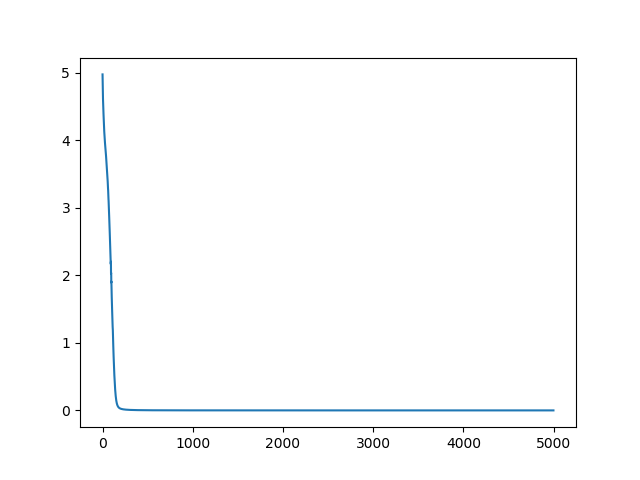

In [42]:
from IPython.display import Image
Image("corpus/drumsamplesReduced2/loss.png")

`python train.py --data_dir=corpus/kickDrum/ --num_steps=5000 --silence_threshold=0.0000001`

`python generate.py --wav_out_path=generatedSignals/kickDrum_4999.wav --samples 16000 ./logdir/train/2018-04-15T13-32-01/model.ckpt-4999`

#### Kick Drum

In [45]:
x, sr = librosa.load('generatedSignals/kickDrum_4999.wav')
ipd.Audio(x, rate=sr)

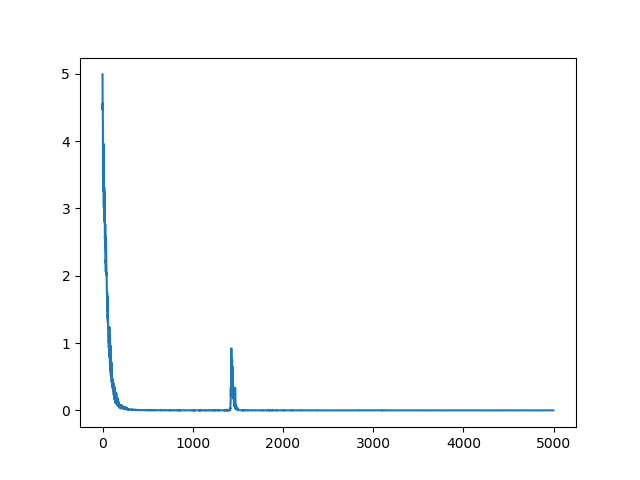

In [46]:
from IPython.display import Image
Image("corpus/kickDrum/loss.png")

#### Snare

`python train.py --data_dir=corpus/snare/ --num_steps=5000 --silence_threshold=0.01`

`python generate.py --wav_out_path=snare_256_4999.wav --samples 16000 ./logdir/train/2018-04-15T14-18-48/model.ckpt-4999`

`quantization_channels = 256`

In [50]:
x, sr = librosa.load('generatedSignals/snare_256_4999.wav')
ipd.Audio(x, rate=sr)

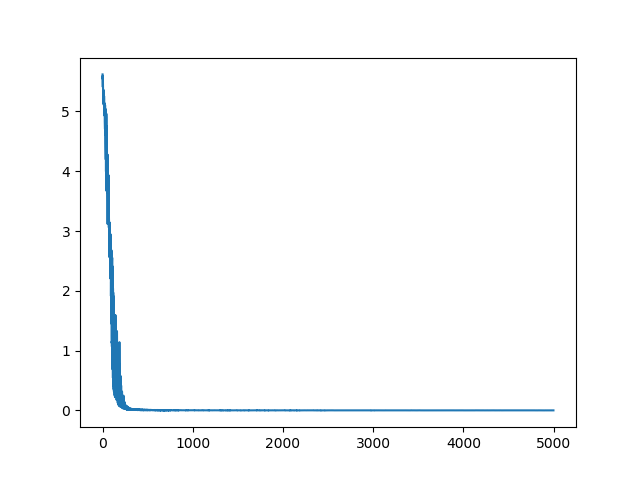

In [52]:
from IPython.display import Image
Image("corpus/snare/loss.png")

#### Hit Hat

In [55]:
x, sr = librosa.load('generatedSignals/hithat_256_4999.wav')
ipd.Audio(x, rate=sr)

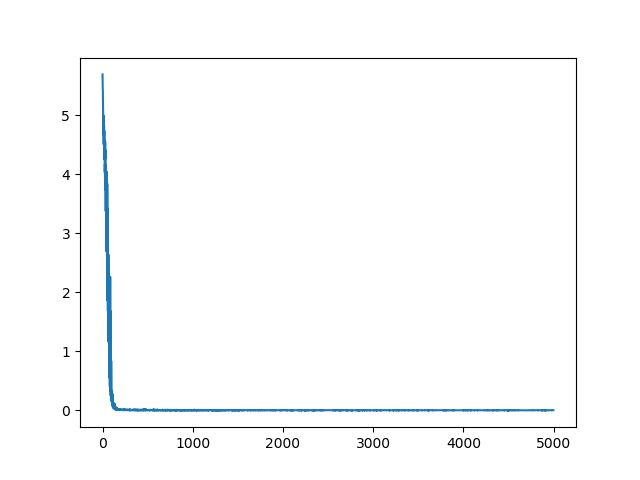

In [56]:
from IPython.display import Image
Image("corpus/hithat/loss.png")

#### Tom

In [57]:
x, sr = librosa.load('generatedSignals/tom_256_4998.wav')
ipd.Audio(x, rate=sr)

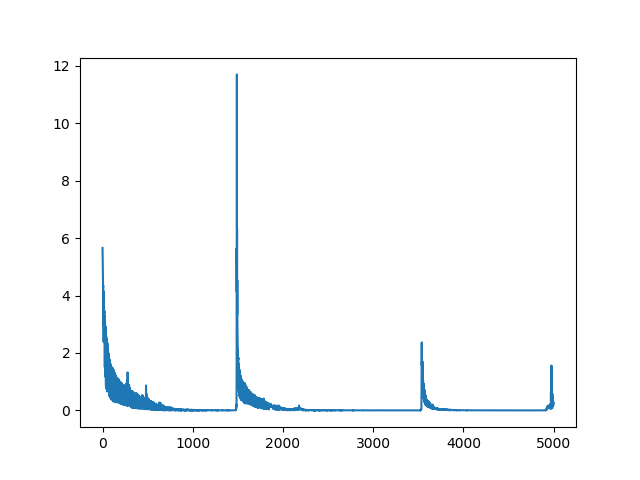

In [58]:
from IPython.display import Image
Image("corpus/tom/loss.png")

### Acoustic Scenes Dataset

Here I selected 144 recordings from water (beach and lakes) from the TUT Acoustic Scenes 2017 Dataset [(link)](http://www.cs.tut.fi/sgn/arg/dcase2017/challenge/task-acoustic-scene-classification) and I trained wavenet with a receptive field of .... and 10000 epoch.

In [59]:
x, sr = librosa.load('generatedSignals/water_9999.wav')
ipd.Audio(x, rate=sr)